# NumPy Basics: Arrays and Vectorized Computation
<br/>
NumPy, short for Numerical Python, is one of the most important foundational packages
for numerical computing in Python

## 4.1 The NumPy ndarray: A Multidimensional Array Object
NumPy最重要的一个特点就是其N维数组对象（即`ndarray` N-dimensional array），该对象是一个快速而灵活的大数据集容器。你可以利用这种数组对整块数据执行一些数学运算，其语法跟标量元素之间的运算一样。

In [1]:
import numpy as np
data = np.random.randn(2, 3)
data

array([[ 0.77440392,  0.72244088,  1.53265123],
       [ 1.41245924, -0.39433263, -0.19206906]])

In [2]:
data * 10

array([[ 7.74403915,  7.22440879, 15.32651228],
       [14.12459239, -3.94332634, -1.92069056]])

In [3]:
data + data

array([[ 1.54880783,  1.44488176,  3.06530246],
       [ 2.82491848, -0.78866527, -0.38413811]])

ndarray是一个通用的同构数据多维容器，也就是说，其中的所有元素必须是相同类型的。每个数组都有一个shape（一个表示各维度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）：

In [4]:
print(data.shape) #没有（）
print(data.dtype) #没有（）

(2, 3)
float64


### Creating ndarrays
创建数组最简单的办法就是使用array函数。它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的NumPy数组。

In [5]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [6]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [7]:
# check dimensions of the arrays
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


#### Zeros & Ones

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

由于NumPy关注的是数值计算，因此，如果没有特别指定，数据类型基本都是float64。也可以用下面的表创建

| Function          | Description                                                                                                                                                                            |
|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| array             | Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a dtype or explicitly specifying a dtype; copies the input data by default           |
| asarray           | Convert input to ndarray, but do not copy if the input is already an ndarray                                                                                                           |
| arange            | Like the built-in range but returns an ndarray instead of a list                                                                                                                       |
| one, one_like     | Produce an array of all 1s with the given shape and dtype; ones_like takes another array and produces a ones array of the same shape and dtype                                         |
| zero, zero_like   | Like ones and ones_like but producing arrays of 0s instead                                                                                                                             |
| empty, empty_like | Create new arrays by allocating new memory, but do not populate with any values like ones and zeros                                                                                    |
| full, full_like   | Produce an array of the given shape and dtype with all values set to the indicated “fill value”, full_like takes another array and produces a filled array of the same shape and dtype |
| eye, identity     | Create a square N x N identity matrix (1s on the diagonal and 0s elsewhere)                                                                                                            |

### Data Types for ndarrays

In [11]:
# 初始化时，指定数据类型
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [12]:
# 指定数据类型
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

dtype('int32')

#### 通过astype 进行数据类型转换

In [13]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr)
print(float_arr.dtype)

int64
[1. 2. 3. 4. 5.]
float64


In [14]:
# convert string to numerical
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float) #notice: float instead of float64

array([ 1.25, -9.6 , 42.  ])

In [15]:
# convert to same dtype
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### Arithmetic with NumPy Arrays
数组很重要，因为它使你不用编写循环即可对数据执行批量运算。NumPy用户称其为矢量化（vectorization）。大小相等的数组之间的任何算术运算都会将运算应用到元素级：

In [16]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [17]:
print(arr * arr)
print(arr - arr)
print(arr * 2)

[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [18]:
# Boolean
arr1 = np.array([[1., 2., 3.], [4., 5., 6.]])
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr1 > arr2

array([[ True, False,  True],
       [False,  True, False]])

### Basic Indexing and Slicing
#### Indexing
1-D array

In [19]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
arr[5]

5

In [21]:
arr[:5]

array([0, 1, 2, 3, 4])

In [22]:
arr[5:8]

array([5, 6, 7])

In [23]:
# 注意普通list 不可以这样赋值
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

#### 切片只是引用！浅拷贝！

In [24]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [25]:
# 改变切片，也会改变原数组
arr_slice[1] = 1111
arr

array([   0,    1,    2,    3,    4,   12, 1111,   12,    8,    9])

In [26]:
# deep copy()
arr = np.array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])
copy = arr[5:8].copy()
copy[1] = 1111
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

2-D Array

In [27]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [28]:
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


#### 二维数组的索引方式。轴0作为行，轴1作为列。
<img src='./resources/numpy index.png' alt='boosting' style="width: 200px;"/>

In [29]:
# 如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d.shape

(2, 2, 3)

In [30]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [31]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [33]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [34]:
arr3d[0,1,2]

6

#### Slicing
1-D

In [35]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [36]:
arr[1:6]

array([ 1,  2,  3,  4, 12])

2-D

In [37]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [38]:
# first two rows
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [39]:
 arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

<img src='./resources/numpy slicing.png' alt='boosting' style="width: 400px;"/>


### Boolean Indexing

In [40]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [41]:
data

array([[-0.71246931, -0.10651657,  0.03273649,  1.31476437],
       [ 0.34571747, -0.42177182, -1.16317737,  1.60670208],
       [-1.07820709, -1.0717917 ,  0.28995283,  0.68675542],
       [-1.15745716, -0.25513717, -0.8831083 ,  0.89574518],
       [ 0.70490413, -0.08708723,  0.59296595, -1.24524021],
       [-0.09887183, -0.84473949,  1.67416818,  1.11679838],
       [-1.26689135,  0.65697   , -0.68406921,  0.82370391]])

假设每个名字都对应data数组中的一行，而我们想要选出对应于名字"Bob"的所有行。跟算术运算一样，数组的比较运算（如==）也是矢量化的。因此，对names和字符串"Bob"的比较运算将会产生一个布尔型数组：

In [42]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [43]:
data[names == 'Bob']

array([[-0.71246931, -0.10651657,  0.03273649,  1.31476437],
       [-1.15745716, -0.25513717, -0.8831083 ,  0.89574518]])

In [44]:
# 利用布尔限定行
data[names == 'Bob', 2:]

array([[ 0.03273649,  1.31476437],
       [-0.8831083 ,  0.89574518]])

In [45]:
#利用布尔限定行
data[names == 'Bob', 3]

array([1.31476437, 0.89574518])

In [46]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.03273649, 1.31476437],
       [0.34571747, 0.        , 0.        , 1.60670208],
       [0.        , 0.        , 0.28995283, 0.68675542],
       [0.        , 0.        , 0.        , 0.89574518],
       [0.70490413, 0.        , 0.59296595, 0.        ],
       [0.        , 0.        , 1.67416818, 1.11679838],
       [0.        , 0.65697   , 0.        , 0.82370391]])

In [47]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.34571747, 0.        , 0.        , 1.60670208],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 1.67416818, 1.11679838],
       [0.        , 0.65697   , 0.        , 0.82370391]])

### Fancy indexing
花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。假设我们有一个8×4数组：

In [48]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [49]:
arr[[4, 3, 0, 6],:]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [50]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组：

In [51]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [52]:
# 行列两两组合:选出的是元素(1,0)、(5,3)、(7,1)和(2,2).
# 无论数组是多少维的，花式索引总是一维的。
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [53]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

花式索引跟切片不一样，它总是将数据复制到新数组中。

### Transposing Arrays and Swapping Axes
转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）.

数组不仅有transpose方法，还有一个特殊的T属性：

In [54]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [55]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积：

In [56]:
arr = np.random.randn(6, 3)
arr

array([[-1.78267474e-01, -1.60265049e-03, -8.30941360e-01],
       [-9.98978702e-03, -8.35903470e-02, -6.66546013e-01],
       [-1.31027422e+00,  9.85753588e-01, -1.63635094e-02],
       [-2.69793648e-01, -1.65098133e-01,  1.84168042e+00],
       [ 1.03050627e+00, -1.08031197e+00, -7.69690882e-01],
       [ 1.73942336e+00, -2.31030450e+00,  5.31951687e-01]])

In [57]:
np.dot(arr.T,arr)

array([[ 5.90902302, -6.3778102 , -0.18852662],
       [-6.3778102 ,  7.51053826, -0.66060397],
       [-0.18852662, -0.66060397,  5.40219831]])

对于高维数组，`transpose`需要得到一个由轴编号组成的元组才能对这些轴进行转置.第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变。

In [58]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [59]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [60]:
# Same as
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [61]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 4.2 Universal Functions: Fast Element-Wise Array Functions
通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

In [62]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [64]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

#### Binary ufunc

In [65]:
 x = np.random.randn(8)
 y = np.random.randn(8)
print(x)
print(y)

[ 0.15444548 -0.49404979  0.21063588  0.32031991  1.25576672  0.35008266
 -0.01180419 -0.11207908]
[-0.03643545 -0.41969614  1.96659533  1.29810882  1.04195683  1.4710792
  0.07510308  0.84828677]


In [66]:
np.maximum(x, y)

array([ 0.15444548, -0.41969614,  1.96659533,  1.29810882,  1.25576672,
        1.4710792 ,  0.07510308,  0.84828677])

有些ufunc的确可以返回多个数组。modf就是一个例子，它是Python内置函数divmod的矢量化版本，它会返回浮点数数组的小数和整数部分：

In [67]:
arr = np.random.randn(7) * 5
arr

array([ 5.57134834, -2.34297043, -6.02995604,  0.70170785, -1.54811017,
        7.00026082,  4.02752008])

In [68]:
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[ 5.71348342e-01 -3.42970425e-01 -2.99560415e-02  7.01707847e-01
 -5.48110172e-01  2.60824328e-04  2.75200830e-02]
[ 5. -2. -6.  0. -1.  7.  4.]


Ufuncs可以接受一个out可选参数，这样就能在数组原地进行操作：

In [69]:
arr

array([ 5.57134834, -2.34297043, -6.02995604,  0.70170785, -1.54811017,
        7.00026082,  4.02752008])

In [70]:
np.sqrt(arr,arr)

/Users/jkchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([2.36037038,        nan,        nan, 0.83768004,        nan,
       2.6458006 , 2.00686823])

In [71]:
# arr 原array 被改变了
arr

array([2.36037038,        nan,        nan, 0.83768004,        nan,
       2.6458006 , 2.00686823])

#### Unary ufuncs <br/>


| Function                                         | Description                                                                                                 |
|--------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| abs, fabs                                        | Compute the absolute value element-wise for integer, floating-point, or complex values                      |
| sqrt                                             | Compute the square root of each element (equivalent to arr ** 0.5)                                          |
| square                                           | Compute the square of each element (equivalent to arr ** 2)                                                 |
| exp                                              | Compute the exponent ex of each element                                                                     |
| log, log10,log2, log1p                           | Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively                           |
| sign                                             | Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)                                  |
| ceil                                             | Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number)       |
| floor                                            | Compute the floor of each element (i.e., the largest integer less than or equal to each element)            |
| rint                                             | Round elements to the nearest integer, preserving the dtype                                                 |
| modf                                             | Return fractional and integral parts of array as a separate array                                           |
| isnan                                            | Return boolean array indicating whether each value is NaN (Not a Number)                                    |
| isfinite, isinf                                  | Return boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite, respectively |
| cos, cosh, sin, sinh, tan, tanh                  | Regular and hyperbolic trigonometric functions                                                              |
| arccos, arccosh, arcsin, arcsinh,arctan, arctanh | Inverse trigonometric functions                                                                             |
| logical_not                                      | Compute truth value of not x element-wise (equivalent to ~arr).                                             |
|                                                  |                                                                                                             |
|                                                  |                                                                                                             |

#### Binary universal functions <br/>
| Function | Description |
|----------|-------------|
|add| Add corresponding elements in arrays|
|subtract| Subtract elements in second array from first array|
|multiply| Multiply array elements|
|divide, floor_divide| Divide or floor divide (truncating the remainder)|
|power| Raise elements in first array to powers indicated in second array|
|maximum, fmax| Element-wise maximum; fmax ignores NaN|
|minimum, fmin| Element-wise minimum; fmin ignores NaN|
|mod| Element-wise modulus (remainder of division)|
|copysign| Copy sign of values in second argument to values in first argument|
|greater, greater_equal,less, less_equal,equal, not_equal|Perform element-wise comparison, yielding boolean array (equivalent to infix operators >, >=, <, <=, ==, !=)|
|logical_and,logical_or, logical_xor|Compute element-wise truth value of logical operation (equivalent to infix operators & &#00124;, ^)|

## 4.3 Array-Oriented Programming with Arrays
NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。
<br/>

作为简单的例子，假设我们想要在一组值（网格型）上计算函数sqrt(x^2+y^2)。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）：

In [72]:
points = np.arange(-5, 5, 0.01, dtype=float)  #1000 points from -5 to 5
xs, ys = np.meshgrid(points,points)
z = np.sqrt(xs ** 2 + ys **2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [73]:
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray);
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.colorbar();

### Expressing Conditional Logic as Array Operations
#### numpy.where函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组：

In [74]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从yarr中选取。

In [75]:
res = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
res

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能写得非常简洁：

In [76]:
res = np.where(cond,xarr,yarr)
res

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用np.where，则会非常简单：

In [77]:
arr = np.random.randn(4, 4)
arr

array([[ 0.9752323 , -0.88908504, -0.11250907, -0.88712229],
       [-0.07214757, -0.69527011,  1.33975347,  0.58463989],
       [ 0.32001866,  0.95938298,  0.72224217,  0.43186543],
       [-0.6845646 , -0.85154141, -0.24368445, -0.25308972]])

In [78]:
arr > 0

array([[ True, False, False, False],
       [False, False,  True,  True],
       [ True,  True,  True,  True],
       [False, False, False, False]])

In [79]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2, -2],
       [-2, -2,  2,  2],
       [ 2,  2,  2,  2],
       [-2, -2, -2, -2]])

In [80]:
# 使用np.where，可以将标量和数组结合起来。
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.88908504, -0.11250907, -0.88712229],
       [-0.07214757, -0.69527011,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.6845646 , -0.85154141, -0.24368445, -0.25308972]])

### Mathematical and Statistical Methods
sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

In [81]:
arr = np.random.randn(5, 4)
arr

array([[-0.19221025,  0.72365081, -1.89380482, -0.29243408],
       [-0.83186521, -0.51860373, -0.05864259, -1.80027515],
       [-0.29985582, -1.53692554, -0.69419013,  1.02701333],
       [ 0.79253901,  1.49926271,  0.66126135, -0.73627005],
       [-1.4285167 , -2.3659193 ,  0.14864374,  1.2100136 ]])

In [82]:
# whole array
print(arr.mean())
print(np.mean(arr))
print(arr.sum())
print(np.sum(arr))

-0.32935644136691955
-0.32935644136691955
-6.5871288273383914
-6.5871288273383914


In [83]:
# sum of every row, dimension=1
print(arr.mean(axis=1))
# sum of every col, dimension=0
print(arr.mean(axis=0))

[-0.41369959 -0.80234667 -0.37598954  0.55419825 -0.60894467]
[-0.39198179 -0.43970701 -0.36734649 -0.11839047]


#### numpy.cumsum(a, axis=None, dtype=None, out=None)
axis=0，按照行累加。

axis=1，按照列累加。

axis不给定具体值，就把numpy数组当成一个一维数组。

In [84]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [85]:
np.cumsum(a)
# [1，1+2=3，1+2+3=6，1+2+3+4=10，1+2+3+4+5=15，1+2+3+4+5+6=21]

array([ 1,  3,  6, 10, 15, 21])

np.cumsum(a,axis=0) #按照列累加，列求和

```python
array([[1, 2, 3],
       [5, 7, 9]])    
                        [1, 2, 3]------>     |1     |2     |3    |
                        [4, 5, 6]------>     |5=1+4 |7=2+5 |9=3+6|
```

np.cumsum(a,axis=1) #按照行累加，行求和
```python
array([[ 1,  3,  6],
       [ 4,  9, 15]])
                        [1, 2, 3]------>     |1     |2+1    |3+2+1   |
                        [4, 5, 6]------>     |4     |4+5    |4+5+6   |
```

| Method         | Description                                                                                                        |
|----------------|--------------------------------------------------------------------------------------------------------------------|
| sum            | Sum of all the elements in the array or along an axis; zero-length arrays have sum 0                               |
| mean           | Arithmetic mean; zero-length arrays have NaN mean                                                                  |
| std, var       | Standard deviation and variance, respectively, with optional degrees of freedom adjustment (default denominator n) |
| min, max       | Minimum and maximum                                                                                                |
| argmin, argmax | Indices of minimum and maximum elements, respectively                                                              |
| cumsum         | Cumulative sum of elements starting from 0                                                                         |
| cumprod        | Cumulative product of elements starting from 1                                                                     |

### Methods for Boolean Arrays
any() and all()

In [86]:
arr = np.random.randn(100)
(arr > 0).sum()

47

In [87]:
bools = np.array([False, False, True, False])
bools.any()

True

In [88]:
bools.all()

False

### Sorting

In [89]:
# 1-D
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr)

[ 1.35374663  1.49278359 -0.92801201  1.06025934  0.1852598  -0.46621598]
[-0.92801201 -0.46621598  0.1852598   1.06025934  1.35374663  1.49278359]


In [90]:
# 2-D
arr = np.random.randint(10,size=9).reshape(3,3)
print(arr)
# sort each row
arr.sort(axis=1)
print(arr)
# sort each col
arr.sort(axis = 0)
print(arr)

[[7 3 2]
 [9 3 2]
 [9 8 5]]
[[2 3 7]
 [2 3 9]
 [5 8 9]]
[[2 3 7]
 [2 3 9]
 [5 8 9]]


### Unique and Other Set Logic
类似于set

In [91]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [92]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

集合运算

| Methods          | Descriptions                                                   |
|------------------|----------------------------------------------------------------|
| unique(x)        | 计算x中的唯一元素，并返回有序的结果                            |
| intersect1d(x,y) | 计算x和y中的公共元素，并返回有序结果                           |
| union1d(x,y)     | 计算x和y中的并集，并返回有序结果                               |
| in1d(x,y)        | 得到一个表示‘x的元素是否在y中’的布尔型数组                     |
| setdiff1d(x,y)   | 集合的差，元素在x中且不在y中                                   |
| setxor1d(x,y)    | 集合的对称差，即存在于一个数组中，但不同时存在于两个数组中的数 |

## 4.4 File Input and Output with Arrays

np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的：

In [93]:
arr = np.arange(10)
np.save('some_array',arr)

In [94]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可

In [95]:
np.savez('array_archive.npz', a=arr, b=arr)

In [96]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [97]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)
res = np.load('arrays_compressed.npz')
res['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 4.5 Linear Algebra

In [98]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [99]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [100]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [101]:
# same as
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

@符（类似Python 3.5）也可以用作中缀运算符，进行矩阵乘法：

In [102]:
x @ np.ones(3)

array([ 6., 15.])

In [103]:
# same as 
np.dot(x,np.ones(3))

array([ 6., 15.])

numpy.linalg:

| Methods | Descriptions                                                 |
|---------|--------------------------------------------------------------|
| diag    | 以一维数组的形式返回方阵的对角线元素，或将一维数组转换为方阵 |
| dot     | 矩阵乘法                                                     |
| trace   | 对角线元素的和                                               |
| det     | 计算矩阵行列式                                               |
| eig     | 计算方阵的本征值和本征向量                                   |
| inv     | 计算方阵的逆                                                 |
| pinv    | 计算矩阵的Moor-Penrose伪逆                                   |
| qr      | 计算OR分解                                                   |
| svd     | 计算奇异值分解（SVD）                                        |
| solve   | 解线性方程组Ax= b，其中A为一个方阵                           |
| lstsq   | 计算Ax=b的最小二乘法                                         |

## 4.6 Pseudorandom Number Generation
numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。例如，你可以用normal来得到一个标准正态分布的4×4样本数组：

In [104]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.82820477,  0.71813075, -0.39030602,  1.58765321],
       [ 1.36115731, -0.3929153 , -0.61018383, -1.33733938],
       [-0.75801087,  1.2324304 ,  1.61607257, -0.89994747],
       [ 0.5566366 ,  0.37052288, -0.6999438 , -0.1477883 ]])

我们说这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。你可以用NumPy的np.random.seed更改随机数生成种子：

In [105]:
np.random.seed(1234)

numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器：

In [106]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

### numpy.random
| Method | Description |
|--------|-------------|
|seed| Seed the random number generator 确定随机数生成器种子|
|permutation| Return a random permutation of a sequence, or return a permuted range 返回一个序列的随机排列或返回一个随机排列的范围|
|shuffle| Randomly permute a sequence in-place 对一个序列就地随机排序|
|rand| Draw samples from a uniform distribution 产生均匀分布的样本值|
|randint| Draw random integers from a given low-to-high range 从给定的上下限范围内随机选取整数|
|randn| Draw samples from a normal distribution with mean 0 and standard deviation 1  产生正态分布（平均值0，标准差为1）|
|binomial| Draw samples from a binomial distribution 产生二项分布的样本值|
|normal| Draw samples from a normal (Gaussian) distribution 产生正态（高斯）分布的样本值|
|beta| Draw samples from a beta distribution 产生Beta分布的样本值|
|chisquare| Draw samples from a chi-square distribution 产生卡方分布的样本值|
|gamma| Draw samples from a gamma distribution 产生Gamma分布的样本值|
|uniform| Draw samples from a uniform [0, 1) distribution 产生在[0,1)中均匀分布的样本值|

## 4.7 Example

In [107]:
position = 0
walk= [position]
steps = 1000
for i in range(steps):
    step = 1 if np.random.randint(0,2) else -1
    position += step
    walk.append(position)

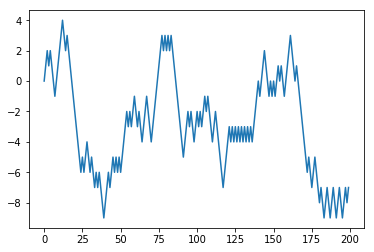

In [108]:
plt.plot(walk[:200])